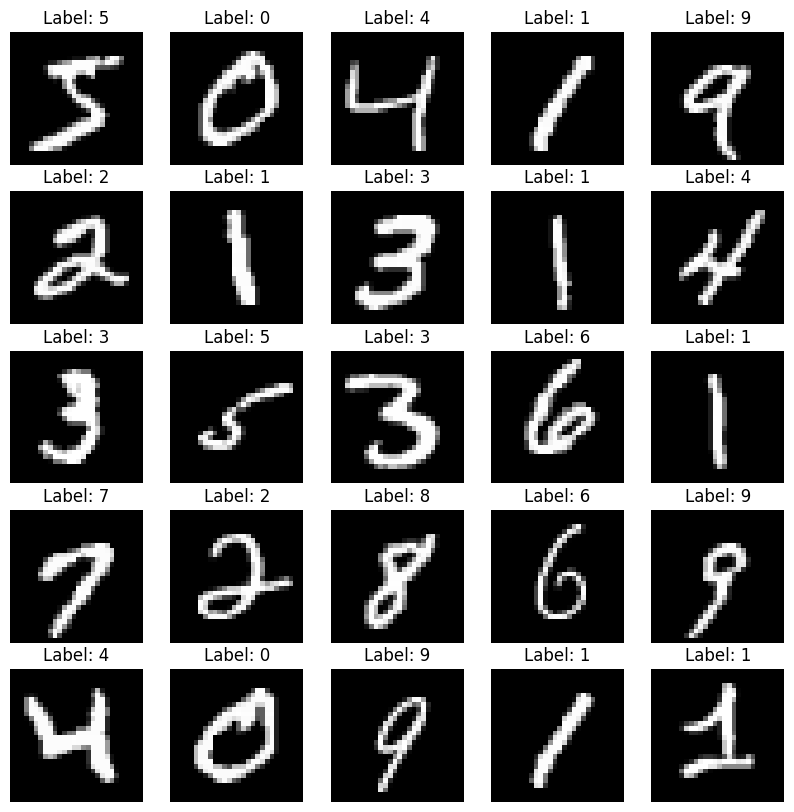

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Visualize a few random samples from the training dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

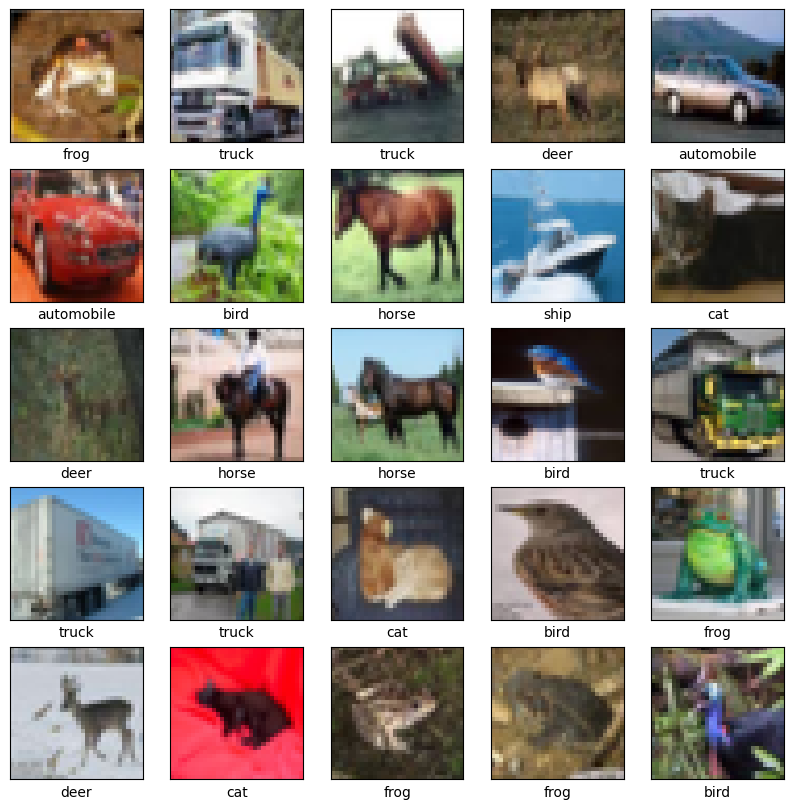

In [ ]:
from tensorflow.keras import datasets, layers, models


(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()



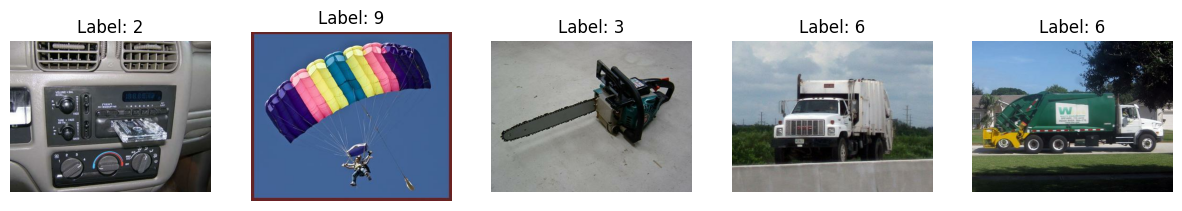

In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# Load the imagenette dataset
imagenet_dir = "imagenette/320px"  # Use the correct dataset name

dataset, info = tfds.load(imagenet_dir, with_info=True)

# Now you can work with the dataset as needed

# Visualize a few random samples from the training dataset
num_samples = 5
fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))  # Create a single row of subplots

for i, example in enumerate(dataset['validation'].take(num_samples)):
    image, label = example['image'], example['label']
    ax = axes[i]
    ax.imshow(image)
    ax.set_title(f"Label: {label.numpy()}")
    ax.axis('off')

plt.show()


Epoch 1/10
1875/1875 [==============================] - 39s 15ms/step - loss: 0.6338 - accuracy: 0.7901 - val_loss: 0.3095 - val_accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.4607 - accuracy: 0.8467 - val_loss: 0.2096 - val_accuracy: 0.9365
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.4184 - accuracy: 0.8631 - val_loss: 0.2156 - val_accuracy: 0.9315
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4238 - accuracy: 0.8605 - val_loss: 0.2456 - val_accuracy: 0.9039
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4159 - accuracy: 0.8647 - val_loss: 0.1889 - val_accuracy: 0.9396
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.4112 - accuracy: 0.8608 - val_loss: 0.1855 - val_accuracy: 0.9436
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.4018 - accuracy: 0.8666 - val_loss: 0.1817 -

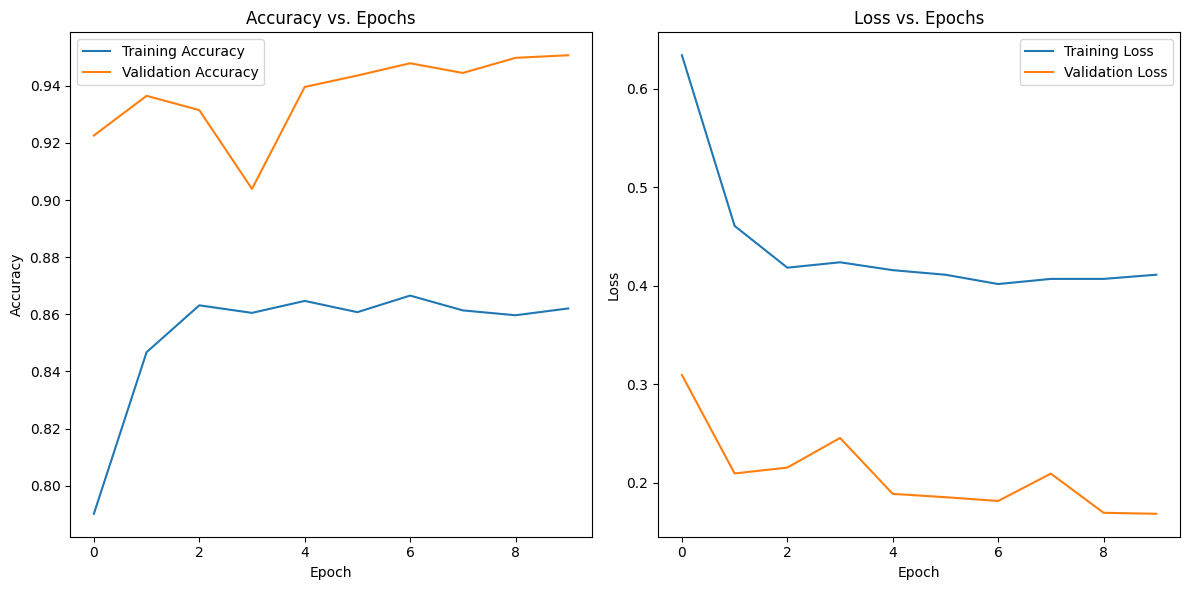

In [ ]:
# VGG16 Model pretrained on Imagenet Weights for MNIST

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Resize MNIST images to match VGG16 input size (48x48) and convert to 3 channels
x_train_resized = [cv2.cvtColor(cv2.resize(x, (48, 48)), cv2.COLOR_GRAY2RGB) for x in x_train]
x_test_resized = [cv2.cvtColor(cv2.resize(x, (48, 48)), cv2.COLOR_GRAY2RGB) for x in x_test]

x_train_resized = tf.convert_to_tensor(x_train_resized, dtype=tf.float32)
x_test_resized = tf.convert_to_tensor(x_test_resized, dtype=tf.float32)

# Normalize the data to values between 0 and 1
x_train_resized /= 255.0
x_test_resized /= 255.0

# Load the pre-trained VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the layers of the VGG16 base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model with custom classification layers on top
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Fine-tune the model
history = model.fit(x_train_resized, y_train, epochs=10, batch_size=32, validation_data=(x_test_resized, y_test))

# Plot the training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')

plt.tight_layout()
plt.show()


58889256/58889256 [==============================] - 4s 0us/step


Epoch 1/30
1563/1563 [==============================] - ETA: 0s - loss: 1.4939 - accuracy: 0.4761
Epoch 1: val_accuracy improved from -inf to 0.55370, saving model to vgg16_finetuned.h5
1563/1563 [==============================] - 28s 12ms/step - loss: 1.4939 - accuracy: 0.4761 - val_loss: 1.2780 - val_accuracy: 0.5537
Epoch 2/30
   1/1563 [..............................] - ETA: 18s - loss: 1.5601 - accuracy: 0.4688

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1562/1563 [============================>.] - ETA: 0s - loss: 1.3022 - accuracy: 0.5453
Epoch 2: val_accuracy improved from 0.55370 to 0.57430, saving model to vgg16_finetuned.h5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3023 - accuracy: 0.5452 - val_loss: 1.2266 - val_accuracy: 0.5743
Epoch 3/30
1560/1563 [============================>.] - ETA: 0s - loss: 1.2497 - accuracy: 0.5628
Epoch 3: val_accuracy improved from 0.57430 to 0.58240, saving model to vgg16_finetuned.h5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2494 - accuracy: 0.5628 - val_loss: 1.1905 - val_accuracy: 0.5824
Epoch 4/30
1559/1563 [============================>.] - ETA: 0s - loss: 1.2159 - accuracy: 0.5761
Epoch 4: val_accuracy improved from 0.58240 to 0.59510, saving model to vgg16_finetuned.h5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2166 - accuracy: 0.5759 - val_loss: 1.1630 - val_accuracy: 0.5951
Epoch 5/30
1559/1563 [=================

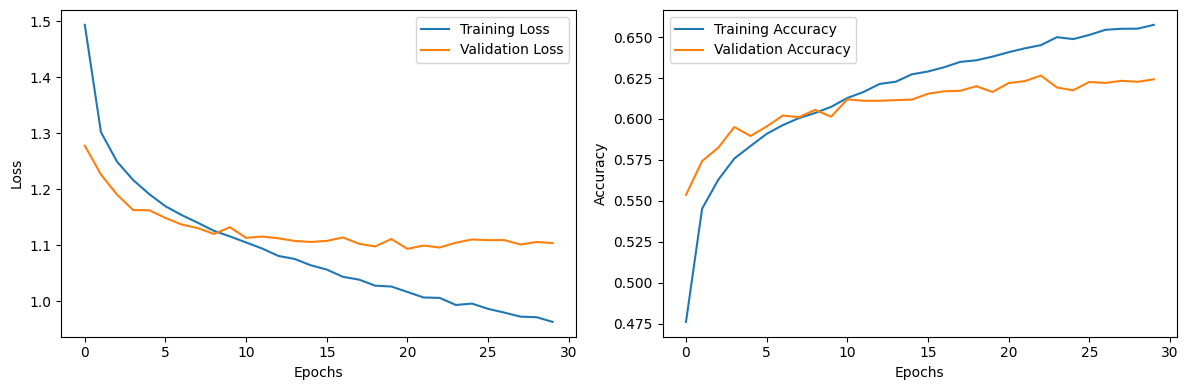

In [ ]:
# VGG16 Model pretrained on Imagenet Weights for CIFAR-10
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint("vgg16_finetuned.h5", monitor="val_accuracy", save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=10, verbose=1)

batch_size = 32
epochs = 30

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[checkpoint, early_stopping],
)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10
1875/1875 [==============================] - 37s 15ms/step - loss: 2.3020 - accuracy: 0.1111 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 2.3018 - accuracy: 0.1105 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 2.3019 - accuracy: 0.1104 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 2.3019 - accuracy: 0.1120 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 2.3019 - accuracy: 0.1105 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 2.3020 - accuracy: 0.1119 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 2.3019 - accuracy: 0.1100 - val_loss: 2.3017 -

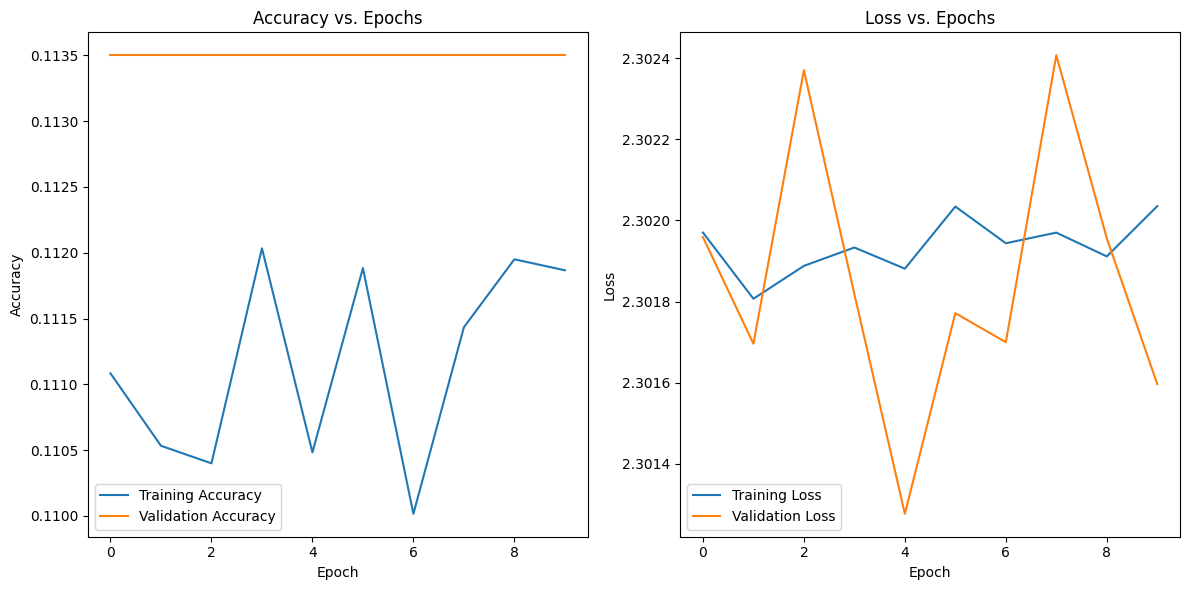

In [ ]:
# VGG16 Model pretrained with NO Weights for MNIST
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_resized = [cv2.cvtColor(cv2.resize(x, (48, 48)), cv2.COLOR_GRAY2RGB) for x in x_train]
x_test_resized = [cv2.cvtColor(cv2.resize(x, (48, 48)), cv2.COLOR_GRAY2RGB) for x in x_test]

x_train_resized = tf.convert_to_tensor(x_train_resized, dtype=tf.float32)
x_test_resized = tf.convert_to_tensor(x_test_resized, dtype=tf.float32)

x_train_resized /= 255.0
x_test_resized /= 255.0

base_model = VGG16(weights=None, include_top=False, input_shape=(48, 48, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

history = model.fit(x_train_resized, y_train, epochs=10, batch_size=32, validation_data=(x_test_resized, y_test))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')

plt.tight_layout()
plt.show()


58889256/58889256 [==============================] - 2s 0us/step


Epoch 1/30
1563/1563 [==============================] - ETA: 0s - loss: 1.4843 - accuracy: 0.4795
Epoch 1: val_accuracy improved from -inf to 0.55630, saving model to vgg16_finetuned.h5
1563/1563 [==============================] - 20s 11ms/step - loss: 1.4843 - accuracy: 0.4795 - val_loss: 1.2728 - val_accuracy: 0.5563
Epoch 2/30
   1/1563 [..............................] - ETA: 28s - loss: 1.4922 - accuracy: 0.5938

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1562/1563 [============================>.] - ETA: 0s - loss: 1.2962 - accuracy: 0.5484
Epoch 2: val_accuracy improved from 0.55630 to 0.56320, saving model to vgg16_finetuned.h5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2961 - accuracy: 0.5484 - val_loss: 1.2285 - val_accuracy: 0.5632
Epoch 3/30
1563/1563 [==============================] - ETA: 0s - loss: 1.2425 - accuracy: 0.5663
Epoch 3: val_accuracy improved from 0.56320 to 0.58110, saving model to vgg16_finetuned.h5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2425 - accuracy: 0.5663 - val_loss: 1.1814 - val_accuracy: 0.5811
Epoch 4/30
1561/1563 [============================>.] - ETA: 0s - loss: 1.2060 - accuracy: 0.5776
Epoch 4: val_accuracy improved from 0.58110 to 0.58780, saving model to vgg16_finetuned.h5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2060 - accuracy: 0.5776 - val_loss: 1.1674 - val_accuracy: 0.5878
Epoch 5/30
1560/1563 [=================

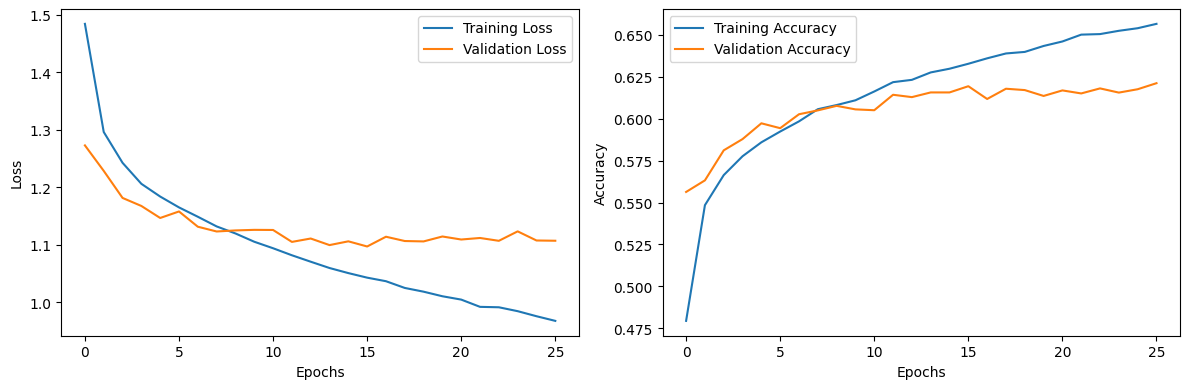

In [ ]:
# VGG16 Model pretrained with NO Weights for CIFAR-10
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

base_model = VGG16(weights=None, include_top=False, input_shape=(32, 32, 3))


for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint("vgg16_finetuned.h5", monitor="val_accuracy", save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=10, verbose=1)

batch_size = 32
epochs = 30

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[checkpoint, early_stopping],
)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


170498071/170498071 [==============================] - 8s 0us/step
Epoch 1/20
781/781 [==============================] - 59s 59ms/step - loss: 2.3188 - accuracy: 0.0083 - val_loss: 2.3026 - val_accuracy: 2.0000e-04
Epoch 2/20
781/781 [==============================] - 46s 59ms/step - loss: 2.3028 - accuracy: 0.0075 - val_loss: 2.3026 - val_accuracy: 0.0000e+00
Epoch 3/20
781/781 [==============================] - 46s 59ms/step - loss: 2.3028 - accuracy: 0.1630 - val_loss: 2.3026 - val_accuracy: 0.0000e+00
Epoch 4/20
781/781 [==============================] - 43s 56ms/step - loss: 2.3027 - accuracy: 0.0077 - val_loss: 2.3026 - val_accuracy: 0.0000e+00
Epoch 5/20
781/781 [==============================] - 45s 57ms/step - loss: 2.3027 - accuracy: 0.0179 - val_loss: 2.3026 - val_accuracy: 0.0000e+00
Epoch 6/20
781/781 [==============================] - 43s 55ms/step - loss: 2.3028 - accuracy: 0.0115 - val_loss: 2.3026 - val_accuracy: 1.0000e-04
Epoch 7/20
781/781 [=========================

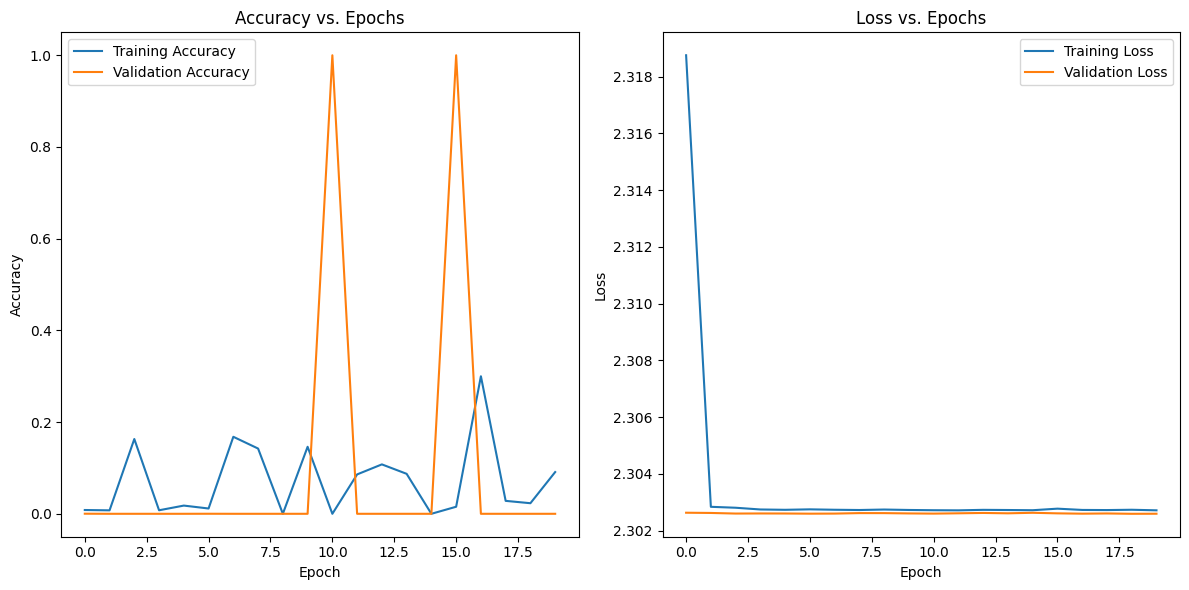

In [ ]:
# ResNet50 pretrained on imageNet for CIFAR-10
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define data augmentation for training data
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a ResNet-50 model with pre-trained weights (excluding top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom top layers for CIFAR-10 classification
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Freeze pre-trained layers (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 20

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

# Plot the training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')

plt.tight_layout()
plt.show()


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/9469 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imagenette/full-size-v2/1.0.0.incompleteR0PT20/imagenette-train.tfrecord*.…

Generating validation examples...:   0%|          | 0/3925 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imagenette/full-size-v2/1.0.0.incompleteR0PT20/imagenette-validation.tfrec…

Dataset imagenette downloaded and prepared to /root/tensorflow_datasets/imagenette/full-size-v2/1.0.0. Subsequent calls will reuse this data.
94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/10
296/296 [==============================] - 174s 364ms/step - loss: 0.3116 - accuracy: 0.9067 - val_loss: 3.0226 - val_accuracy: 0.1195
Epoch 2/10
296/296 [==============================] - 111s 376ms/step - loss: 0.0704 - accuracy: 0.9806 - val_loss: 0.9377 - val_accuracy: 0.7124
Epoch 3/10
296/296 [==============================] - 112s 376ms/step - loss: 0.0491 - accuracy: 0.9867 - val_loss: 0.5284 - val_accuracy: 0.8512
Epoch 4/10
296/296 [==============================] - 112s 377ms/step - loss: 0.0484 - accuracy: 0.9867 - val_loss: 0.3106 - val_accuracy: 0.9223
Epoch 5/10
296/296 [==============================] - 111s 376ms/step - loss: 0.0365 - accuracy: 0.9883 - val_loss: 0.1693 - val_accuracy: 0.9557
Epoch 6/10
296/296 [==============================] - 112s 376m

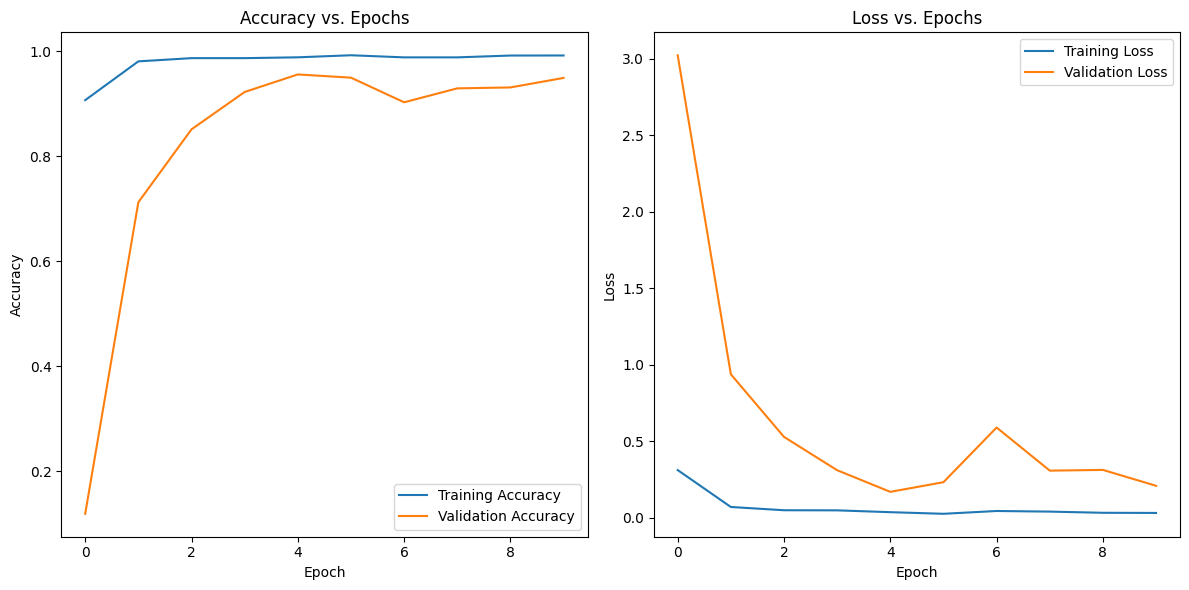

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load and preprocess the Imagenette dataset using TensorFlow Datasets (TFDS)
(ds_train, ds_test), ds_info = tfds.load(
    'imagenette/full-size-v2',  # Use the Imagenette dataset
    split=['train', 'validation'],
    as_supervised=True,
    with_info=True
)

# Resize the images to (224, 224, 3) for ResNet-50
def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values
    return image, label

ds_train = ds_train.map(preprocess_image).batch(32)
ds_test = ds_test.map(preprocess_image).batch(32)

# Create a ResNet-50 model with pre-trained weights (excluding top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom top layers for Imagenette classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' for labels without one-hot encoding
              metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10

history = model.fit(
    ds_train,
    epochs=epochs,
    validation_data=ds_test
)

# Plot the training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')

plt.tight_layout()
plt.show()


170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/20
781/781 [==============================] - 57s 58ms/step - loss: 2.2154 - accuracy: 0.1325 - val_loss: 2.1011 - val_accuracy: 0.0000e+00
Epoch 2/20
781/781 [==============================] - 47s 60ms/step - loss: 2.1127 - accuracy: 0.1341 - val_loss: 2.0245 - val_accuracy: 0.2206
Epoch 3/20
781/781 [==============================] - 46s 59ms/step - loss: 2.0776 - accuracy: 0.1310 - val_loss: 1.9908 - val_accuracy: 0.0847
Epoch 4/20
781/781 [==============================] - 42s 54ms/step - loss: 2.0587 - accuracy: 0.1098 - val_loss: 1.9766 - val_accuracy: 0.0480
Epoch 5/20
781/781 [==============================] - 45s 58ms/step - loss: 2.0399 - accuracy: 0.1106 - val_loss: 1.9669 - val_accuracy: 0.1024
Epoch 6/20
781/781 [==============================] - 44s 57ms/step - loss: 2.0304 - accuracy: 0.1094 - val_loss: 1.9439 - val_accuracy: 0.1082
Epoch 7/20
781/781 [==============================] - 42s 53ms/st

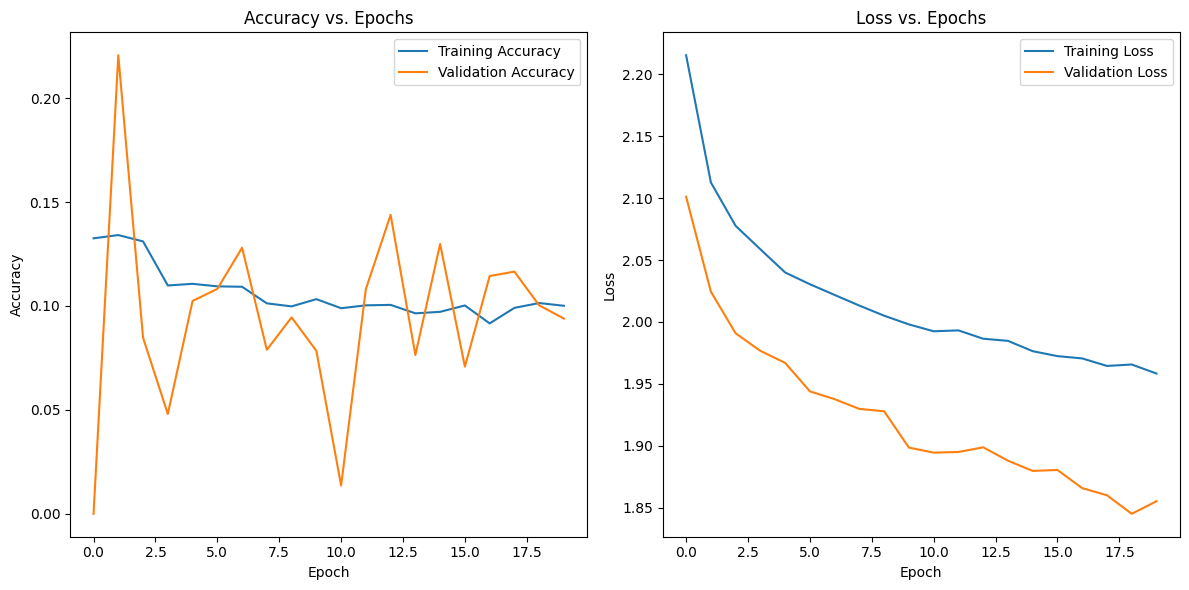

In [ ]:
# ResNet50 pretrained with NO Weights of Imagenet for CIFAR-10
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define data augmentation for training data
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a ResNet-50 model with pre-trained weights (excluding top layers)
base_model = ResNet50(weights=None, include_top=False, input_shape=(32, 32, 3))

# Add custom top layers for CIFAR-10 classification
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Freeze pre-trained layers (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 20

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

# Plot the training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')

plt.tight_layout()
plt.show()


Epoch 1/10
296/296 [==============================] - 152s 382ms/step - loss: 2.1236 - accuracy: 0.2575 - val_loss: 3.5665 - val_accuracy: 0.1284
Epoch 2/10
296/296 [==============================] - 105s 355ms/step - loss: 1.8427 - accuracy: 0.3650 - val_loss: 2.3173 - val_accuracy: 0.2754
Epoch 3/10
296/296 [==============================] - 105s 356ms/step - loss: 1.6615 - accuracy: 0.4412 - val_loss: 1.7604 - val_accuracy: 0.4372
Epoch 4/10
296/296 [==============================] - 105s 355ms/step - loss: 1.5379 - accuracy: 0.4918 - val_loss: 2.5740 - val_accuracy: 0.3167
Epoch 5/10
296/296 [==============================] - 105s 355ms/step - loss: 1.3732 - accuracy: 0.5598 - val_loss: 1.5117 - val_accuracy: 0.5243
Epoch 6/10
296/296 [==============================] - 105s 356ms/step - loss: 1.2049 - accuracy: 0.6094 - val_loss: 1.6174 - val_accuracy: 0.4932
Epoch 7/10
296/296 [==============================] - 111s 376ms/step - loss: 1.0997 - accuracy: 0.6508 - val_loss: 1.5060 -

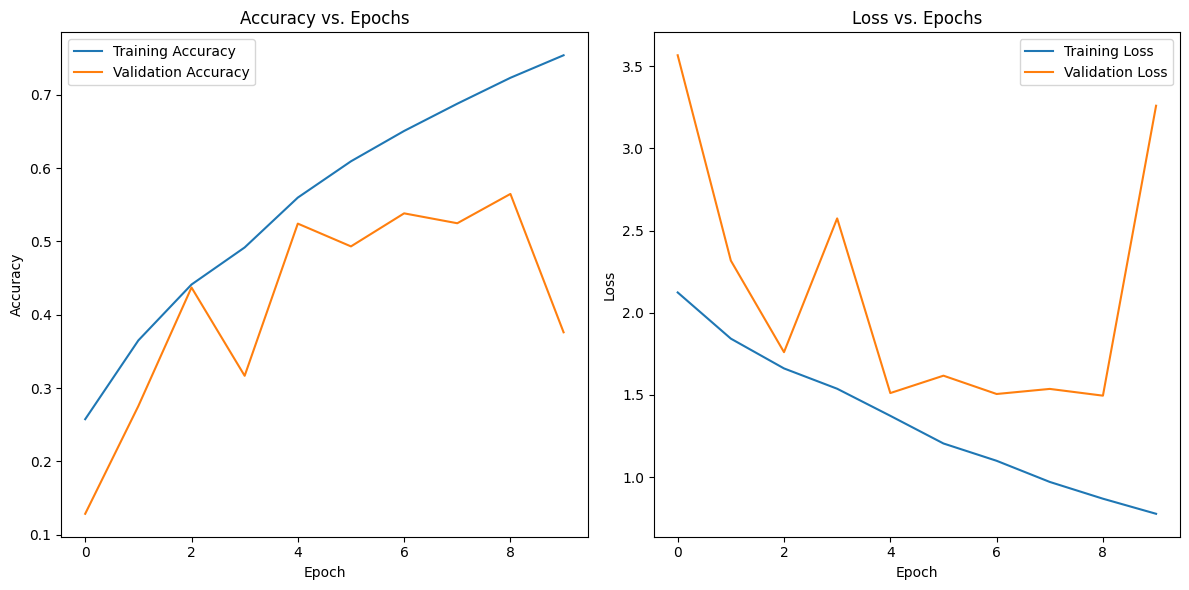

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load and preprocess the Imagenette dataset using TensorFlow Datasets (TFDS)
(ds_train, ds_test), ds_info = tfds.load(
    'imagenette/full-size-v2',  # Use the Imagenette dataset
    split=['train', 'validation'],
    as_supervised=True,
    with_info=True
)

# Resize the images to (224, 224, 3) for ResNet-50
def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values
    return image, label

ds_train = ds_train.map(preprocess_image).batch(32)
ds_test = ds_test.map(preprocess_image).batch(32)

# Create a ResNet-50 model with pre-trained weights (excluding top layers)
base_model = ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3))

# Add custom top layers for Imagenette classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' for labels without one-hot encoding
              metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10

history = model.fit(
    ds_train,
    epochs=epochs,
    validation_data=ds_test
)

# Plot the training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')

plt.tight_layout()
plt.show()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

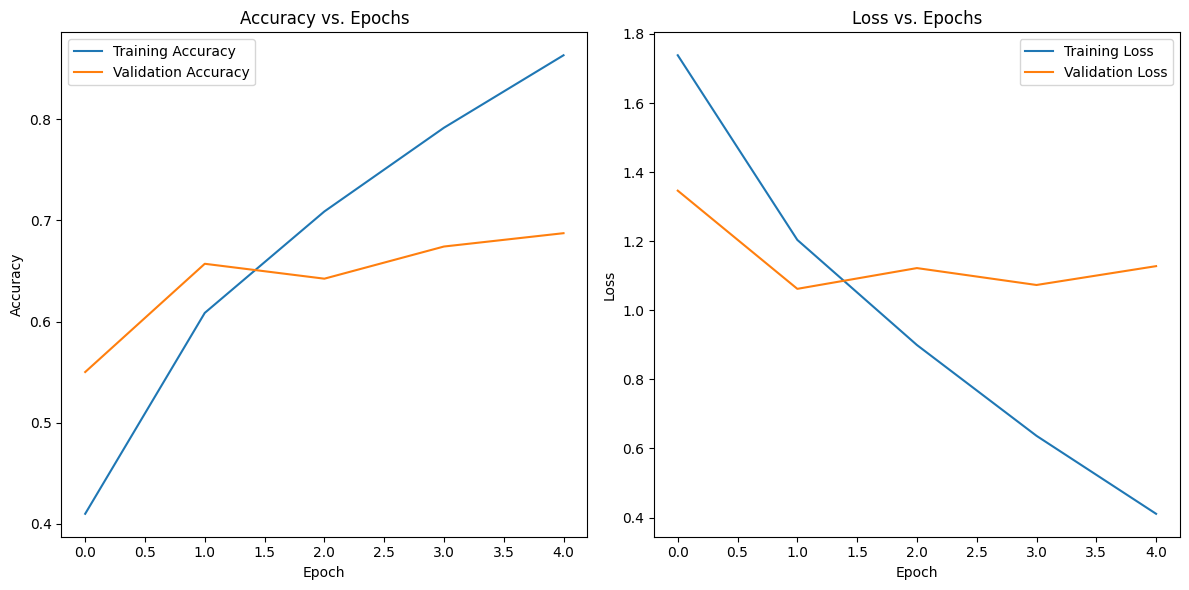

In [ ]:
#Custom CNN 1 for Imagenette

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load and preprocess the Imagenette dataset
#(x_train, y_train), (x_test, y_test) = imagenette.load_data()

dataset_name = "imagenette/320px"
(ds_train, ds_test), ds_info = tfds.load(
    name=dataset_name,

    split=["train[:90%]", "train[90%:]"],
    as_supervised=True,
    with_info=True,
)

# Define a function to preprocess and resize images
def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values to [0, 1]
    return image, label

# Apply preprocessing to the dataset
ds_train = ds_train.map(preprocess_image).batch(32).shuffle(buffer_size=1000)
ds_test = ds_test.map(preprocess_image).batch(32)

def create_custom_cnn(input_shape, num_classes):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the feature maps
    model.add(Flatten())

    # Dense layers
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Example usage:
input_shape = (224, 224, 3)  # Specify the input shape for Imagenette
num_classes = 10  # Number of output classes

model = create_custom_cnn(input_shape, num_classes)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(ds_train, epochs=5, validation_data=ds_test)

# Plot the training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')

plt.tight_layout()
plt.show()


# New Section

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

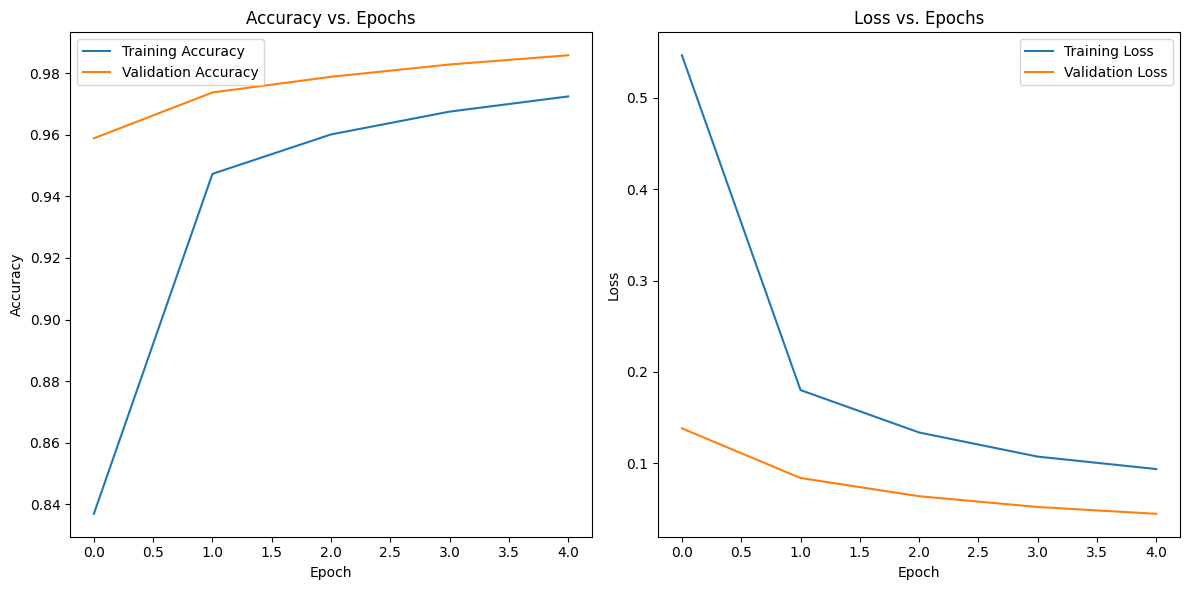

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def preprocess_image(image):
    # Normalize pixel values to be in the range [0, 1]
    image = image / 255.0
    return image

# Preprocess the images
x_train = x_train.reshape((-1, 28, 28, 1))  # Add the channel dimension
x_train = x_train / 255.0
x_test = x_test.reshape((-1, 28, 28, 1))  # Add the channel dimension
x_test = x_test / 255.0

input_shape = (28, 28, 1)  # MNIST images are 28x28 pixels with a single channel
num_classes = 10  # MNIST has 10 classes (digits 0-9)

# Create the Sequential model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Plot the training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')

plt.tight_layout()
plt.show()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

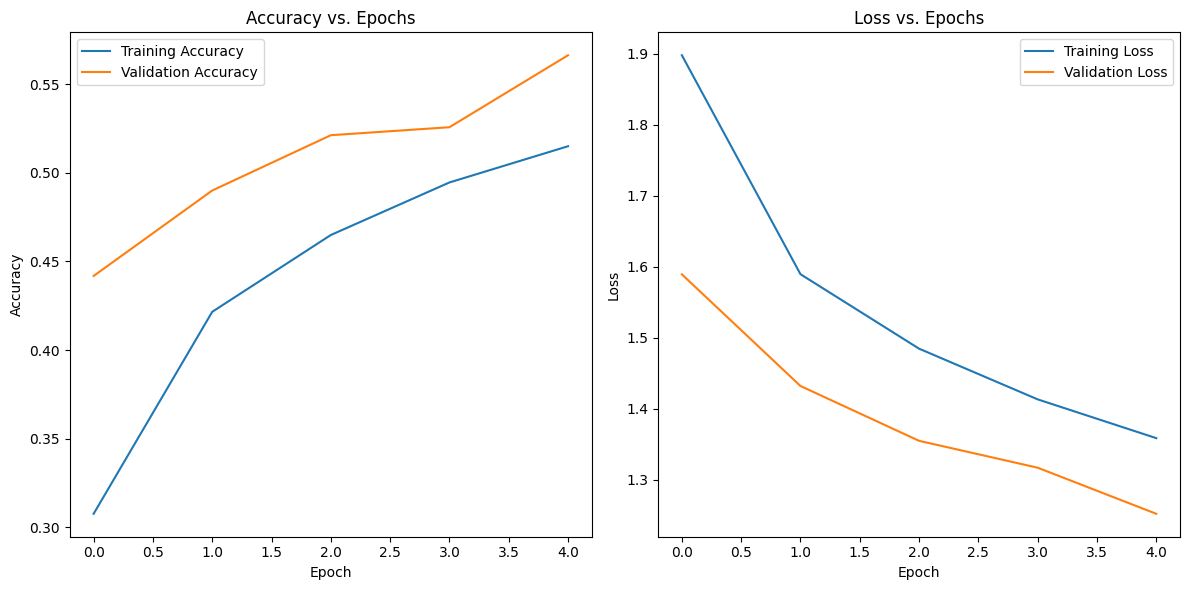

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the images
x_train = x_train / 255.0
x_test = x_test / 255.0

input_shape = (32, 32, 3)
num_classes = 10

# Create the Sequential model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Plot the training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')

plt.tight_layout()
plt.show()


Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2247 - accuracy: 0.9295 - val_loss: 0.0581 - val_accuracy: 0.9800
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0786 - accuracy: 0.9763 - val_loss: 0.0367 - val_accuracy: 0.9884
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0561 - accuracy: 0.9833 - val_loss: 0.0304 - val_accuracy: 0.9905
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0467 - accuracy: 0.9857 - val_loss: 0.0293 - val_accuracy: 0.9894
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0400 - accuracy: 0.9874 - val_loss: 0.0289 - val_accuracy: 0.9906
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0344 - accuracy: 0.9892 - val_loss: 0.0228 - val_accuracy: 0.9926
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0313 - val_accuracy

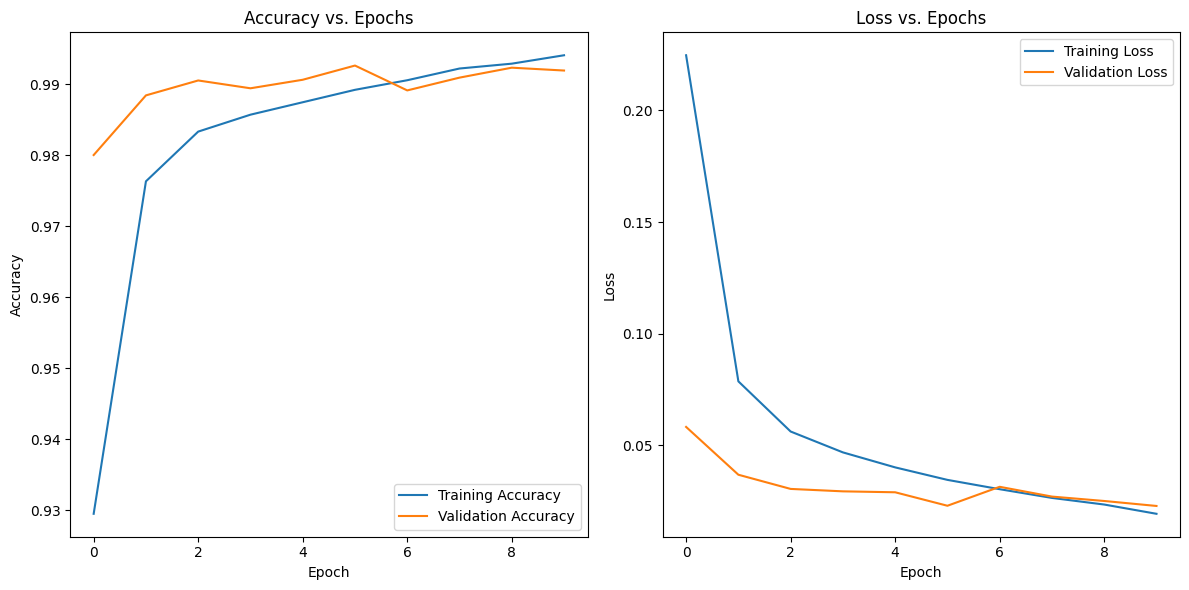

In [ ]:
#CUSTOM CNN 2 for MNIST:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import cv2

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Resize MNIST images to a smaller size (32x32) and convert to 3 channels
x_train_resized = [cv2.cvtColor(cv2.resize(x, (32, 32)), cv2.COLOR_GRAY2RGB) for x in x_train]
x_test_resized = [cv2.cvtColor(cv2.resize(x, (32, 32)), cv2.COLOR_GRAY2RGB) for x in x_test]

x_train_resized = tf.convert_to_tensor(x_train_resized, dtype=tf.float32)
x_test_resized = tf.convert_to_tensor(x_test_resized, dtype=tf.float32)

# Normalize the data to values between 0 and 1
x_train_resized /= 255.0
x_test_resized /= 255.0

# Create a simple CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Train the model
history = model.fit(x_train_resized, y_train, epochs=10, batch_size=32, validation_data=(x_test_resized, y_test))

# Plot the training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')

plt.tight_layout()
plt.show()